In [75]:
print("Gemstone Data")

Gemstone Data


In [76]:
import pandas as pd

In [77]:
"""Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond

carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

cut : Quality of Diamond Cut

color : Color of Diamond

clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

table : A diamond's table is the facet which can be seen when the stone is viewed face up.

x : Diamond X dimension

y : Diamond Y dimension

x : Diamond Z dimension

Target variable:

price: Price of the given Diamond."""

"Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).\n\nThere are 10 independent variables (including id):\n\nid : unique identifier of each diamond\n\ncarat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.\n\ncut : Quality of Diamond Cut\n\ncolor : Color of Diamond\n\nclarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.\n\ndepth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)\n\ntable : A diamond's table is the facet which can be seen when the stone is viewed face up.\n\nx : Diamond X dimension\n\ny : Diamond Y dimension\n\nx : Diamond Z dimension\n\nTarget variable:\n\nprice: Price of the given Diamond."

In [78]:
df = pd.read_csv("gemstone.csv")

In [79]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [80]:
# Drop the id cols because it not require
df.drop(['id'], axis=1, inplace=True)

In [81]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [82]:
print(f"Number of columns : {df.shape[1]}")
print(f"Number of rows : {df.shape[0]}")

Number of columns : 10
Number of rows : 193573


In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB
None


In [84]:
print(df.describe().T)

          count         mean          std    min     25%      50%      75%  \
carat  193573.0     0.790688     0.462688    0.2    0.40     0.70     1.03   
depth  193573.0    61.820574     1.081704   52.1   61.30    61.90    62.40   
table  193573.0    57.227675     1.918844   49.0   56.00    57.00    58.00   
x      193573.0     5.715312     1.109422    0.0    4.70     5.70     6.51   
y      193573.0     5.720094     1.102333    0.0    4.71     5.72     6.51   
z      193573.0     3.534246     0.688922    0.0    2.90     3.53     4.03   
price  193573.0  3969.155414  4034.374138  326.0  951.00  2401.00  5408.00   

            max  
carat      3.50  
depth     71.60  
table     79.00  
x          9.65  
y         10.01  
z         31.30  
price  18818.00  


In [85]:
cat_col = df.columns[df.dtypes=="object"]

In [86]:
print(cat_col)

Index(['cut', 'color', 'clarity'], dtype='object')


In [87]:
num_col = df.columns[df.dtypes!="object"]

In [88]:
print(num_col)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [89]:
df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   carat   193573 non-null  float64
 1   depth   193573 non-null  float64
 2   table   193573 non-null  float64
 3   x       193573 non-null  float64
 4   y       193573 non-null  float64
 5   z       193573 non-null  float64
 6   price   193573 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 10.3 MB


In [90]:
df[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cut      193573 non-null  object
 1   color    193573 non-null  object
 2   clarity  193573 non-null  object
dtypes: object(3)
memory usage: 4.4+ MB


In [91]:
print(f"There is no missing values in the dateset : {df.isnull().sum()}")

There is no missing values in the dateset : carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [92]:
for col in cat_col:
    print(df[col])
    print(f"Length is : {len(df[col].value_counts())}")
    print("_____________________________________")

0           Premium
1         Very Good
2             Ideal
3             Ideal
4           Premium
            ...    
193568        Ideal
193569      Premium
193570    Very Good
193571    Very Good
193572         Good
Name: cut, Length: 193573, dtype: object
Length is : 5
_____________________________________
0         F
1         J
2         G
3         G
4         G
         ..
193568    D
193569    G
193570    F
193571    D
193572    E
Name: color, Length: 193573, dtype: object
Length is : 7
_____________________________________
0          VS2
1          SI2
2          VS1
3          VS1
4          VS2
          ... 
193568    VVS2
193569    VVS2
193570     SI1
193571     SI1
193572     SI2
Name: clarity, Length: 193573, dtype: object
Length is : 8
_____________________________________


In [93]:
for col in num_col:
    print(df[col])
    print(f"Length is : {len(df[col].value_counts())}")
    print("______________________________________________")

0         1.52
1         2.03
2         0.70
3         0.32
4         1.70
          ... 
193568    0.31
193569    0.70
193570    0.73
193571    0.34
193572    0.71
Name: carat, Length: 193573, dtype: float64
Length is : 248
______________________________________________
0         62.2
1         62.0
2         61.2
3         61.6
4         62.6
          ... 
193568    61.1
193569    60.3
193570    63.1
193571    62.9
193572    60.8
Name: depth, Length: 193573, dtype: float64
Length is : 153
______________________________________________
0         58.0
1         58.0
2         57.0
3         56.0
4         59.0
          ... 
193568    56.0
193569    58.0
193570    57.0
193571    55.0
193572    64.0
Name: table, Length: 193573, dtype: float64
Length is : 108
______________________________________________
0         7.27
1         8.06
2         5.69
3         4.38
4         7.65
          ... 
193568    4.35
193569    5.75
193570    5.72
193571    4.45
193572    5.73
Name: x, Length: 19

In [94]:
df[cat_col]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

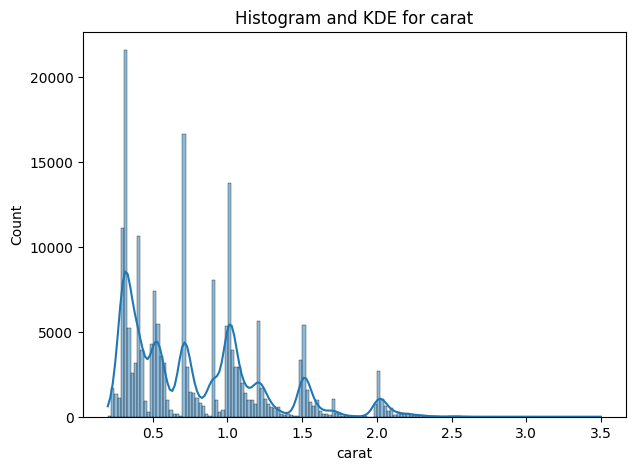

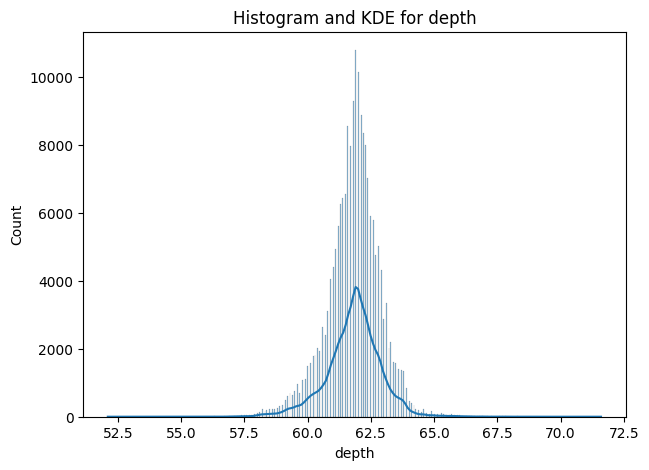

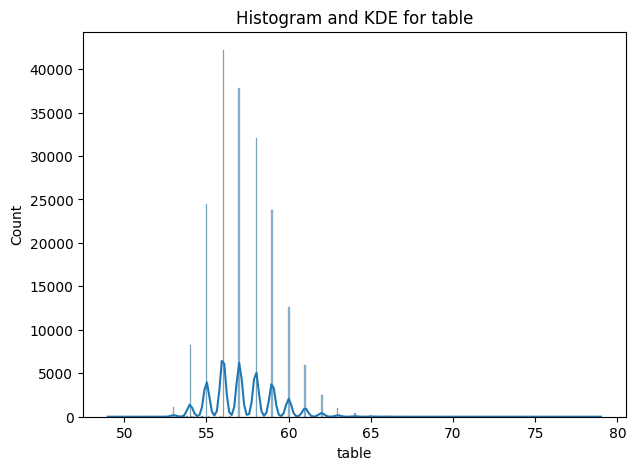

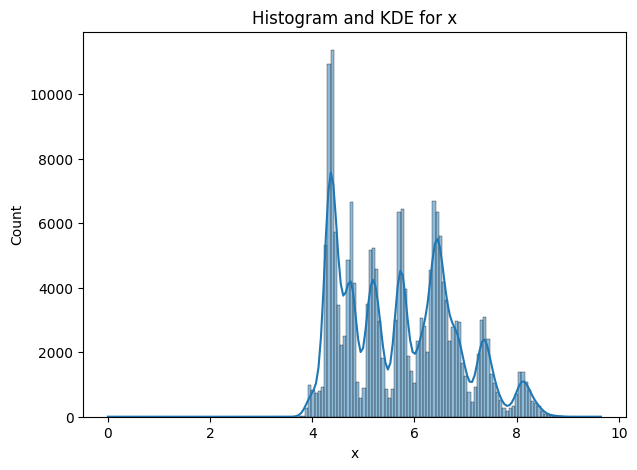

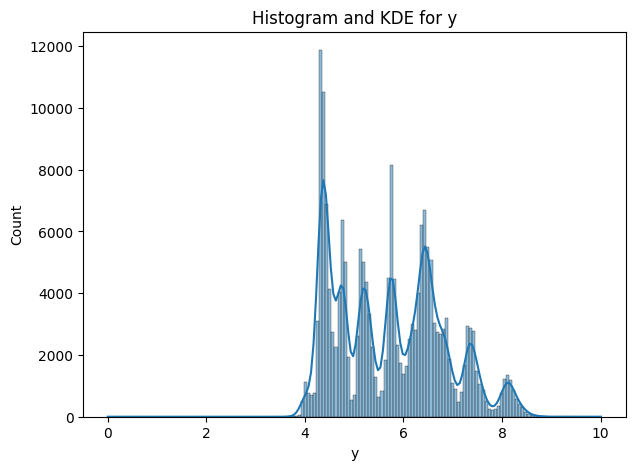

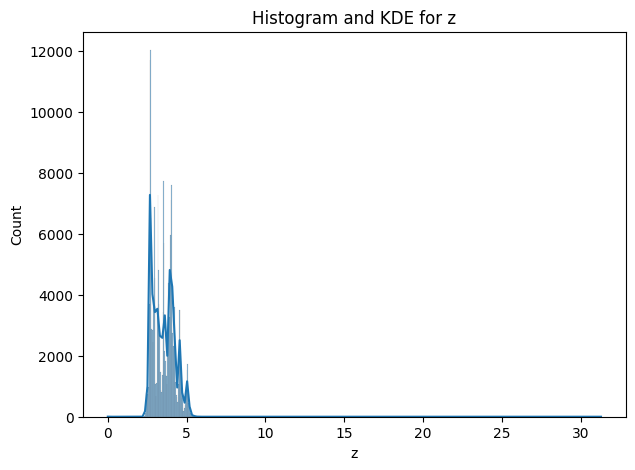

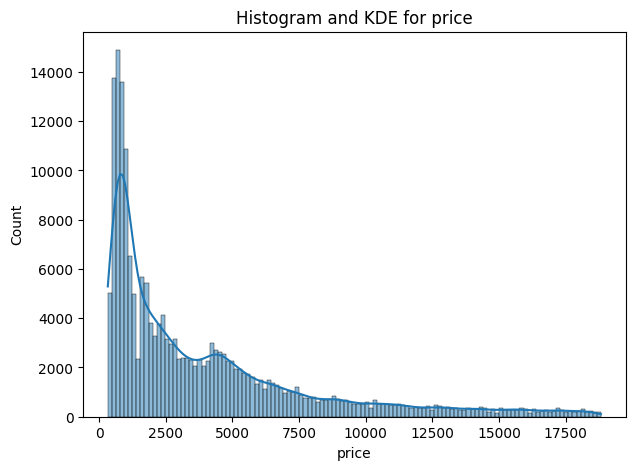

In [96]:
for col in num_col:
    plt.figure(figsize=(7,5)) 
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram and KDE for {col}') 
    plt.show()

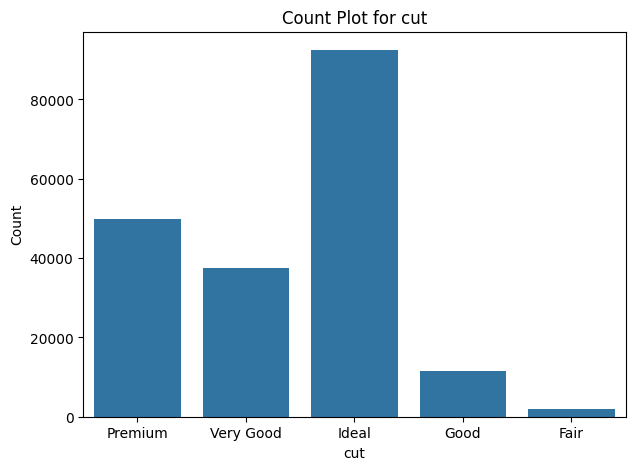

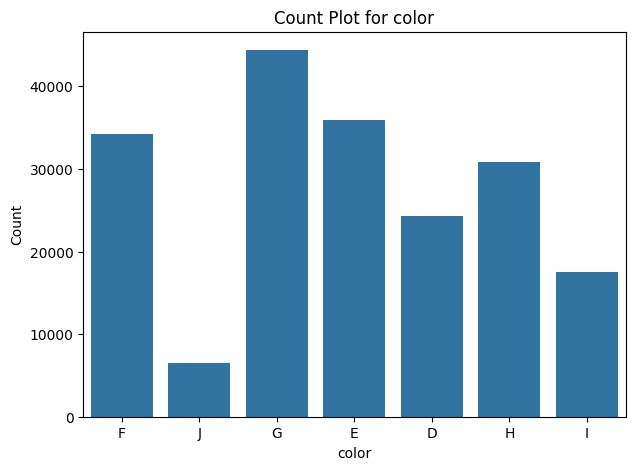

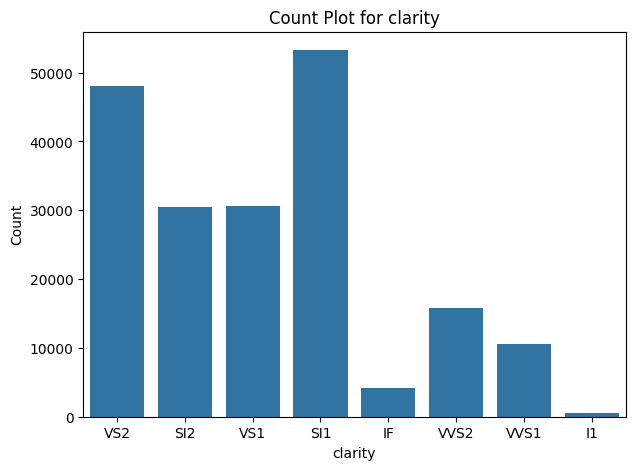

In [97]:
for col in cat_col:
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)  # Optionally add label for x-axis
    plt.ylabel('Count')  # Optionally add label for y-axis
    plt.show()

<Axes: >

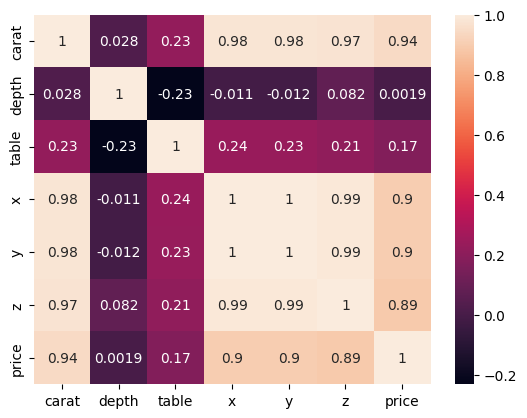

In [98]:
sns.heatmap(df[num_col].corr(),annot=True)

In [99]:
# Define mappings
cut_map = {
    "Fair": 1,
    "Good": 2,
    "Very Good": 3,
    "Premium": 4,
    "Ideal": 5
}

clarity_map = {
    'SI1': 1,
    'VS2': 2,
    'VS1': 3,
    'SI2': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7,
    'I1': 8
}

color_map = {
    'G': 1,
    'E': 2,
    'F': 3,
    'H': 4,
    'D': 5,
    'I': 6,
    'J': 7
}


In [100]:
df["cut"] = df["cut"].map(cut_map)
df["clarity"] = df["clarity"].map(clarity_map)
df["color"] = df["color"].map(color_map)


In [101]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,4,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,1,3,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,1,3,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,1,2,62.6,59.0,7.65,7.61,4.77,14453


Data Preprocessing 

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
# pipeline 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [103]:
df = pd.read_csv("gemstone.csv")

In [104]:
df.head(1)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619


In [105]:
X = df.drop(["id","price"],axis=1)

In [106]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [107]:
y = df["price"]

In [108]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [109]:
X.select_dtypes(include="object")

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [110]:
X.select_dtypes(exclude="object")

,carat,depth,table,x,y,z
0,1.52,62.2,58.0,7.27,7.33,4.55
1,2.03,62.0,58.0,8.06,8.12,5.05
2,0.70,61.2,57.0,5.69,5.73,3.50
3,0.32,61.6,56.0,4.38,4.41,2.71
4,1.70,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67
193569,0.70,60.3,58.0,5.75,5.77,3.47
193570,0.73,63.1,57.0,5.72,5.75,3.62
193571,0.34,62.9,55.0,4.45,4.49,2.81


In [111]:
cat_col = X.select_dtypes(include="object").columns
num_col = X.select_dtypes(exclude="object").columns

In [112]:
cat_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [113]:
num_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [114]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [115]:
num_pipeline = Pipeline(
    steps=[
        ("Imputer",SimpleImputer()),
        ("scale",StandardScaler())
    ]
)

In [116]:
cat_pipeline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]
)

In [118]:
preprocessor = ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,num_col),
        ("cat_pipeline",cat_pipeline,cat_col)
    ]
)

In [119]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [120]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [126]:
print(X_train.shape,y_train.shape)

(135501, 9) (135501,)


In [127]:
print(X_test.shape, y_test.shape)

(58072, 9) (58072,)


In [128]:
preprocessor.fit_transform(X_train)

array([[-0.82314374, -1.12998781, -0.64189666, ...,  4.        ,
         1.        ,  5.        ],
       [ 0.94502267, -1.77782269,  0.92190185, ...,  2.        ,
         4.        ,  4.        ],
       [ 1.9584839 ,  0.16568195,  0.40063568, ...,  3.        ,
         4.        ,  3.        ],
       ...,
       [ 0.92345966,  0.90606467,  0.40063568, ...,  3.        ,
         3.        ,  3.        ],
       [-1.03877378, -0.66724861, -0.64189666, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03877378, -0.01941373,  0.92190185, ...,  2.        ,
         3.        ,  1.        ]])

In [130]:
preprocessor.fit_transform(X_test)

array([[-0.62636845,  0.25853321, -0.11404195, ...,  4.        ,
         0.        ,  2.        ],
       [ 2.63330214, -2.13900051, -0.11404195, ...,  2.        ,
         3.        ,  1.        ],
       [-1.1261846 , -1.21687215,  0.92772113, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.82194868, -0.0181053 , -0.63492349, ...,  4.        ,
         3.        ,  6.        ],
       [ 0.9165423 , -0.66359514,  1.44860267, ...,  3.        ,
         5.        ,  2.        ],
       [ 0.48191955,  0.90402306, -0.63492349, ...,  2.        ,
         1.        ,  3.        ]])

In [131]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z', 'cat_pipeline__cut', 'cat_pipeline__color',
       'cat_pipeline__clarity'], dtype=object)

In [132]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [133]:
X_train

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.823144,-1.129988,-0.641897,-0.780451,-0.835103,-0.876024,4.0,1.0,5.0
1,0.945023,-1.777823,0.921902,1.073226,1.166389,0.946633,2.0,4.0,4.0
2,1.958484,0.165682,0.400636,1.703116,1.755063,1.742237,3.0,4.0,3.0
3,-0.995648,-0.574701,-0.641897,-1.122391,-1.161138,-1.165334,4.0,2.0,6.0
4,-0.995648,0.258230,0.400636,-1.176382,-1.152082,-1.136403,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...
135496,-0.629077,-1.500179,1.964434,-0.546492,-0.518125,-0.644575,2.0,1.0,2.0
135497,2.411307,0.443325,2.485700,1.919078,1.872797,1.930288,2.0,2.0,2.0
135498,0.923460,0.906065,0.400636,0.992240,0.921862,1.047891,3.0,3.0,3.0
135499,-1.038774,-0.667249,-0.641897,-1.212375,-1.197364,-1.252127,2.0,3.0,6.0


In [135]:
X_test

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.629077,0.258230,-0.120630,-0.600482,-0.581521,-0.572248,4.0,0.0,2.0
1,2.605374,-2.148014,-0.120630,2.126042,2.198832,1.959219,2.0,3.0,1.0
2,-1.125026,-1.222536,0.921902,-1.374347,-1.414721,-1.469110,3.0,1.0,6.0
3,-1.017211,-0.574701,0.921902,-1.158385,-1.161138,-1.194265,3.0,5.0,6.0
4,0.858771,0.628421,-0.641897,0.947248,0.985258,1.004495,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
58067,0.255007,0.535873,0.921902,0.416340,0.369414,0.425874,2.0,5.0,1.0
58068,-0.607514,0.535873,-0.641897,-0.528495,-0.554351,-0.499920,4.0,0.0,3.0
58069,-0.823144,-0.019414,-0.641897,-0.834441,-0.862273,-0.847093,4.0,3.0,6.0
58070,0.901897,-0.667249,1.443168,1.046230,0.967145,0.932167,3.0,5.0,2.0


Model Training

In [138]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [142]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Xgboost": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

In [143]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [144]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)
    

LinearRegression()
Lasso()
Ridge()
ElasticNet()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
RandomForestRegressor()


In [145]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'Xgboost', 'RandomForestRegressor'])

In [148]:
def evaluate_model(true,pred):
    r2 = r2_score(true,pred)
    mse=mean_squared_error(true,pred)
    mae=mean_absolute_error(true,pred)
    
    return mse, mae,r2

In [149]:
for i, (model_name, model) in enumerate(models.items()):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    MAE, MSE, R2 = evaluate_model(y_test, y_pred)
    
    # Print model performance
    print(f"Model: {model_name}")
    print("Model training performance:", model)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("R2 SCORE:", R2)
    
    # Append R2 score to the list
    r2_list.append((model_name, R2))
    
    print("="*40)
    print("\n")


Model: LinearRegression
Model training performance: LinearRegression()
MSE: 675.0758270067478
MAE: 1029473.3531156847
R2 SCORE: 0.9362906819996047


Model: Lasso
Model training performance: Lasso()
MSE: 676.3788803086727
MAE: 1029534.1175907081
R2 SCORE: 0.9362869215688461


Model: Ridge
Model training performance: Ridge()
MSE: 675.1087261318758
MAE: 1029482.8329815716
R2 SCORE: 0.9362900953347936


Model: ElasticNet
Model training performance: ElasticNet()
MSE: 1051.172228186302
MAE: 2291130.0570947696
R2 SCORE: 0.8582126162411591


Model: Xgboost
Model training performance: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
 

In [150]:
r2_list

[('LinearRegression', 0.9362906819996047),
 ('Lasso', 0.9362869215688461),
 ('Ridge', 0.9362900953347936),
 ('ElasticNet', 0.8582126162411591),
 ('Xgboost', 0.978611409664154),
 ('RandomForestRegressor', 0.9768452304758458)]

In [151]:
max(r2_list)

('Xgboost', 0.978611409664154)